# OpenCV Opdrachten
- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Docenten:  Michiel Bontenbal en Maarten Post
- Datum: Vrijdag 14 februari 2025

### Doel van dit notebook
In dit Notebook leer je:
- hoe je randen in foto's kan detecteren ('Edge Detection)
- hoe je gezichten kan herkennen met Haar Cascade algoritme

### Wat je moet doen
- Maak de 8 oefeningen in het notebook
- Sla het notebook op in je Gitlab & maak aantekeningen in je logboek.

### Inhoud
0. Installeer en importeer de modules
1. Edge Detection met OpenCV
2. Detecteer gezichten met Haar Cascade
3. Gebruik je webcam

### Tutorial
 
**Geeks for Geeks tutorial**

https://www.geeksforgeeks.org/opencv-python-tutorial/

**OpenCV Python documentatie**

https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html


----
Acknowledgements: Stijn Oomes

## 0. Installeer en importeer de libraries

Als OpenCV niet is geïnstalleerd, installeer deze met onderstaand pip commando.

bron: https://pypi.org/project/opencv-python/

In [30]:
from platform import python_version
python_version = python_version()[0:4]
print(f'Python versie= {python_version}')

if float(python_version[0:4]) >= 3.13:
    print('Jouw python versie is niet geschikt voor openCV.') 

Python versie= 3.12


In [31]:
!pip install opencv-python

In [32]:
import cv2
print(cv2.__version__)

4.11.0


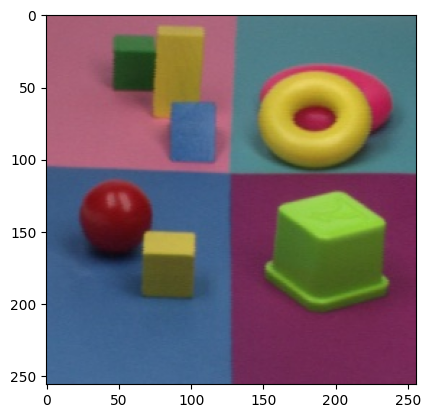

In [34]:
#We gebruiken Matplotlib libray om de afbeeldingen te tonen
import matplotlib.pyplot as plt
import matplotlib.image as img


toyImg = img.imread('toy.jpg')
plt.imshow(toyImg)

#Tenslotte zorgen we nog dat de image in het notebook getoond worden
%matplotlib inline

## 1. Edge Detection met OpenCV

OpenCV kan beelden inlezen, maar de MatPlotLibrary ook; vanwege heel rare en ingewikkelde problemen is het makkelijker om MatPlotLib te gebruiken. Gebruik het commando ```plt.imread('path-to-image')``` om een plaatje in te lezen.

Met MatPlotLib kan je dan ook het plaatje tonen in je notebook. Dit doe je met het commando ```imshow(image)```; ```plt.figure(figsize=(10,10))``` geeft de beeldverhoudingen aan, vierkant in dit geval, en ```plt.axis('off');``` zorgt dat er geen x- en y-as getekend worden, want dat zou er raar uitzien bij een plaatje.

Ons advies is om het plaatje 'speelgoed.jpg' te gebruiken. Deze kan je downloaden van DLO in dezelfde folder als dit notebook. Dan werkt onderstaande code erg goed. Als je wilt dan mag je zelf ook een eigen plaatje gebruiken. 


### Importeer en toon een .jpg afbeelding

Let op: de code werkt alleen met een .jpg of .jpeg plaatje. Dus géén .png gebruiken.
Wij adviseren het plaatje 'speelgoed.jpg' te gebruiken (zie DLO) want dat werkt heel mooi. Wil je een ander plaatje gebruiken, dan mag dat ook.

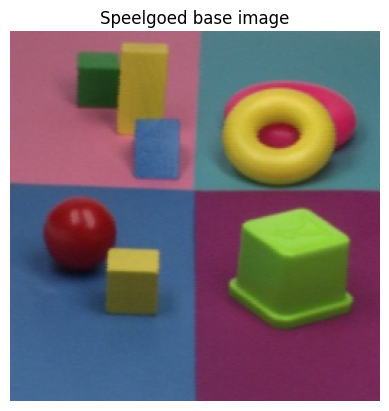

In [38]:
# Import libraries
import matplotlib.pyplot as plt
import cv2

# Load the image 
image = cv2.imread('toy.jpg')

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
# OpenCV is nog zó oud, dat het standaard nog BGR gebruikt in plaats van RGB.  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.title('Speelgoed base image')
plt.show()

OpenCV heeft ook funkties om de kleur, kleurruimte, van plaatjes te veranderen; ```COLOR_RGB2GRAY``` gaat dus van RGB (kleur) naar gray (grijswaarden). Met het commando ```plt.imshow(gray, cmap='gray')``` zorg je ervoor dat er grijswaarden in de plot gebruikt worden, anders kiest matPlotLib een stadaard kleurenschema dat niet grijs is, een soort geel radarscherm kleurschema...

### OEFENING 1: Converteer je plaatje naar grijswaarden


Gebruik de Geeks for Geeks tutorial: https://www.geeksforgeeks.org/opencv-python-tutorial/

In [39]:
#YOUR CODE HERE

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

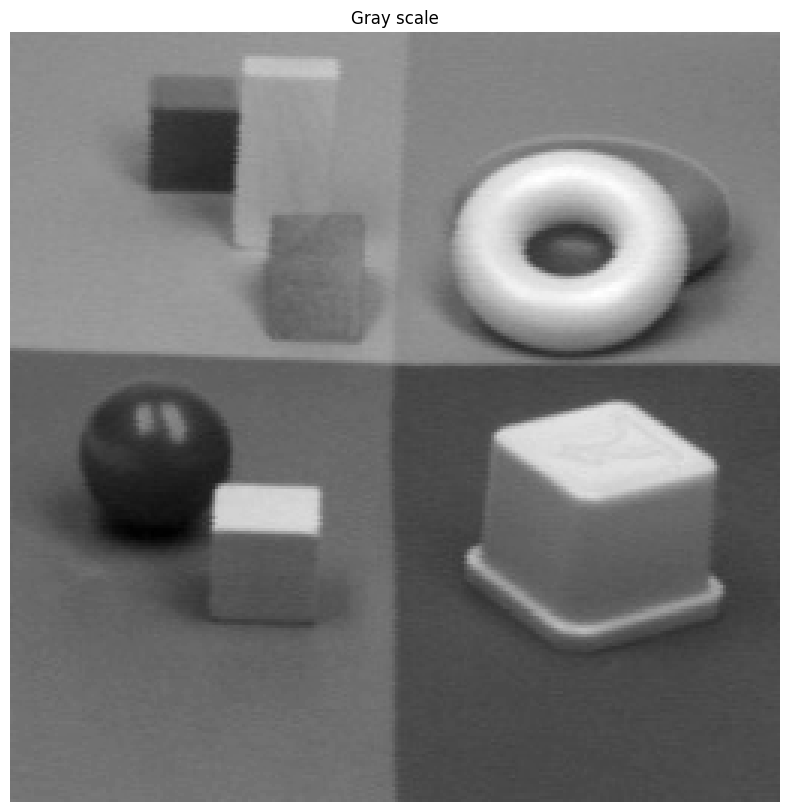

In [40]:
#CODE EXAMPLE: plot het plaatje met matplotlib
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray') #gray is een variabele uit bovenstaande cell
plt.title('Gray scale')
plt.axis('off');

### Detecteer de randen met het Canny algoritme

Een veel voorkomende bewerking in Computer Vision is het herkennen van randen in plaatjes. We gebruiken het Canny algoritme, omdat dat een van de meest gebruikte algoritmes is. Hoe Canny werkt kan je hier nalezen:

- https://nl.wikipedia.org/wiki/Canny-randzoeker
- https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
- https://www.geeksforgeeks.org/python-opencv-canny-function/

Het commando is ```cv2.Canny(gray, 10, 40)```, waarbij ```gray``` het input plaatje is, de 10 en 40 grenzen zijn wanneer een rand herkend wordt; je gaat in de oefening hier mee spelen. Deze waarden werken goed voor mijn plaatje en vast ook voor jou. Kijk in de documentatie van OpenCV hoe je de waarden kan aanpassen.

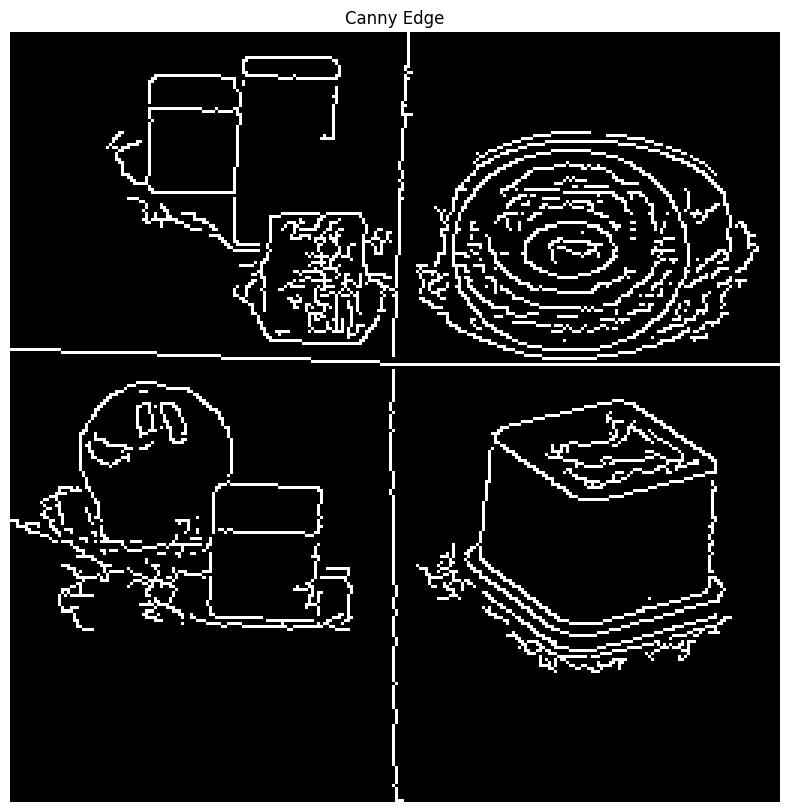

In [41]:
#CODE EXAMPLE
edges = cv2.Canny(gray, 10, 40)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge')
plt.axis('off');

### OEFENING 2 : Optimale waarden voor Canny Edge

Pas de waarden voor de canny edge detectie aan en laat het resultaat zien. Speel hier even mee!

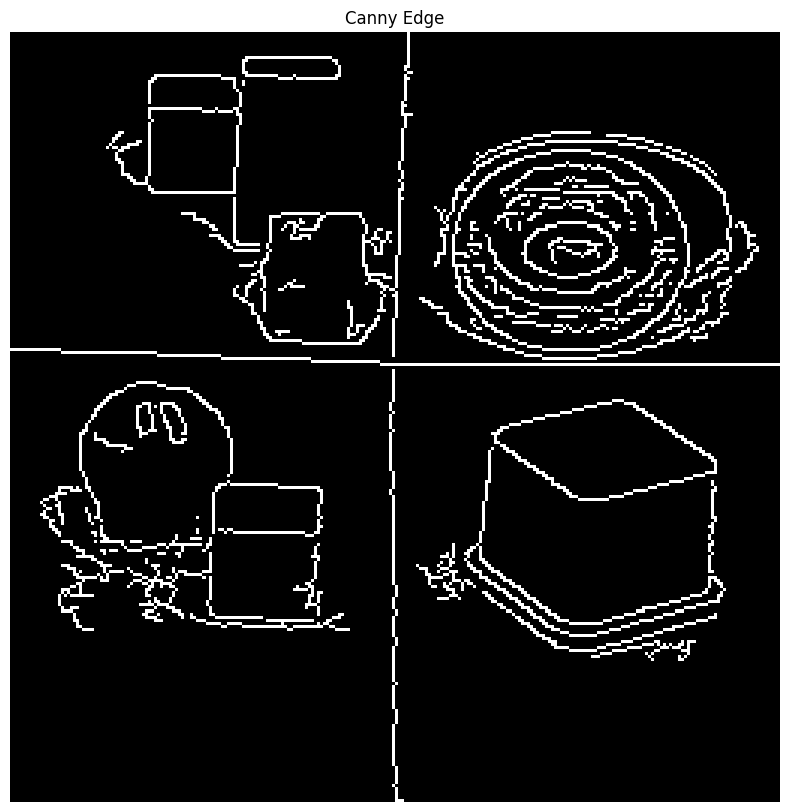

In [54]:
#YOUR CODE HERE
edges = cv2.Canny(gray, 10, 50)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge')
plt.axis('off');

### Andere kleurruimtes: HSV

Zoals je gezien hebt, zitten er best wat *foute* edges bij. Ook maakt de edge detector geen onderscheid tussen schaduwrandenof highlights en de *echte* randen van het object.

Zouden we hier wat aan kunnen doen?

*HSV*, Hue, Saturation en Value, is een adere manier om kleuren te beschrijven; je kent het misschien van PhotoShop. 

- Hue is tint
- Saturation is hoeveel van die tint er in zit
- Value is de helderheid. 

Lees onderstaande voor een introductie op HSV:
- https://www.geeksforgeeks.org/hsv-color-model-in-computer-graphics/


### OEFENING 3: Converteer van RGB naar HSV waarden

Lees de volgende tutorial en zoek het commando op om je kleurenplaatje om te zetten van RGB => HSV waarden: 
- https://www.educba.com/opencv-hsv-range/

In [55]:
#YOUR CODE HERE
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


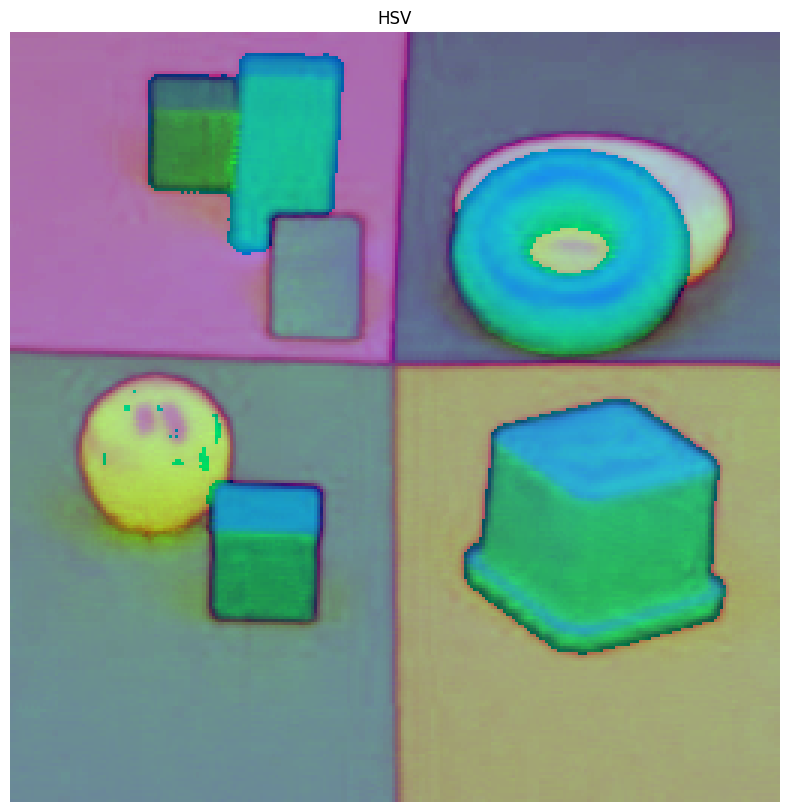

In [56]:
#plot the HSV-image
plt.figure(figsize=(10,10))
plt.imshow(hsv) #de naam van je hsv-plaatje
plt.title('HSV')
plt.axis('off');

Het wordt pas interessant wanneer we de kleur kanalen apart weergeven.

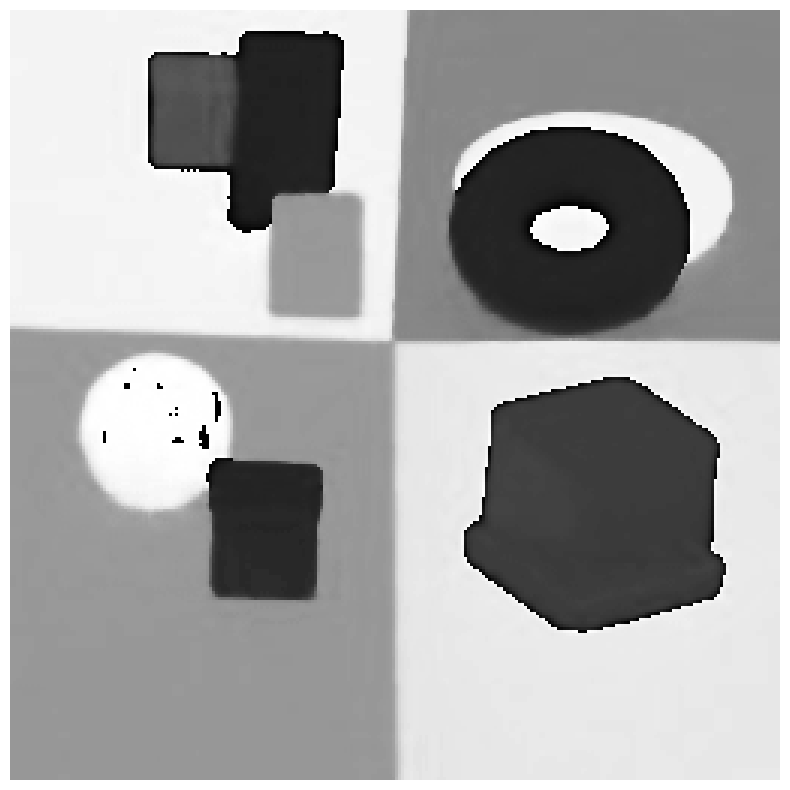

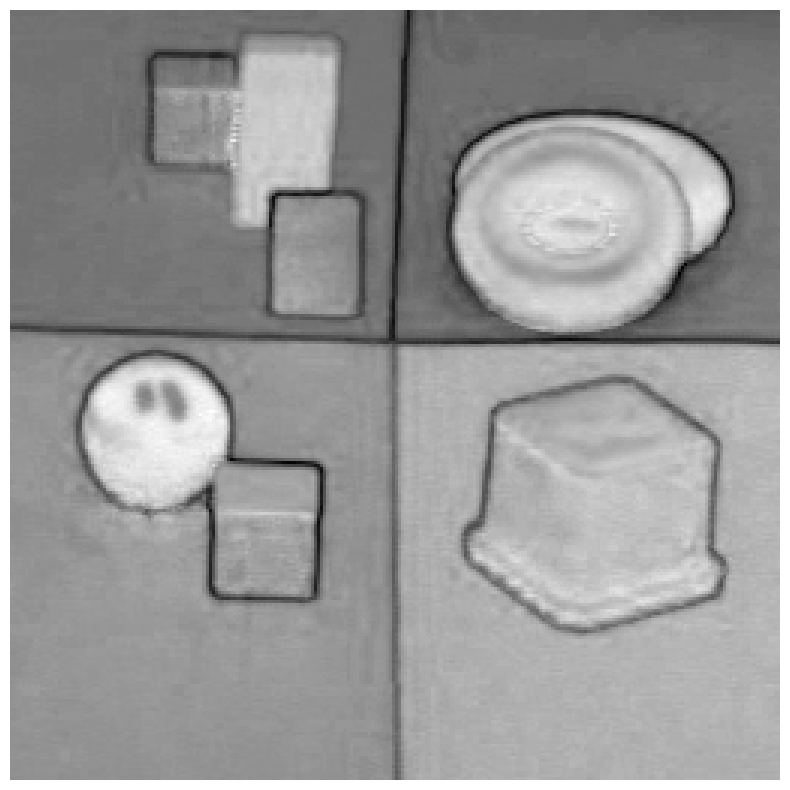

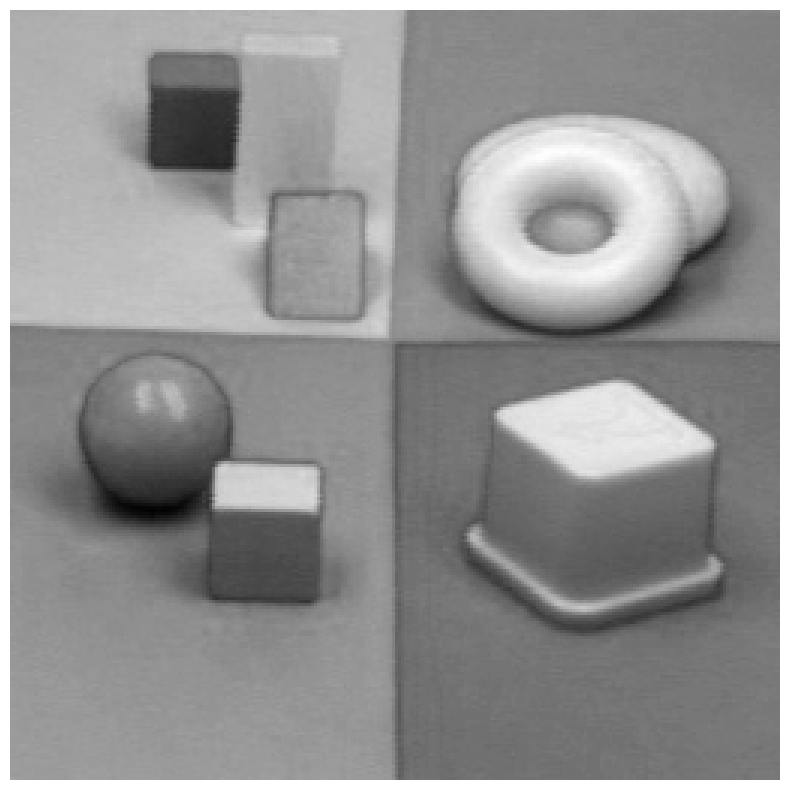

In [57]:
#CODE EXAMPLE: plot each channel separately
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,0], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,1], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,2], cmap='gray')
plt.axis('off');

Kijk wat er nu veranderd is, wanneer we Canny op de losse kleur kanalen toepassen.

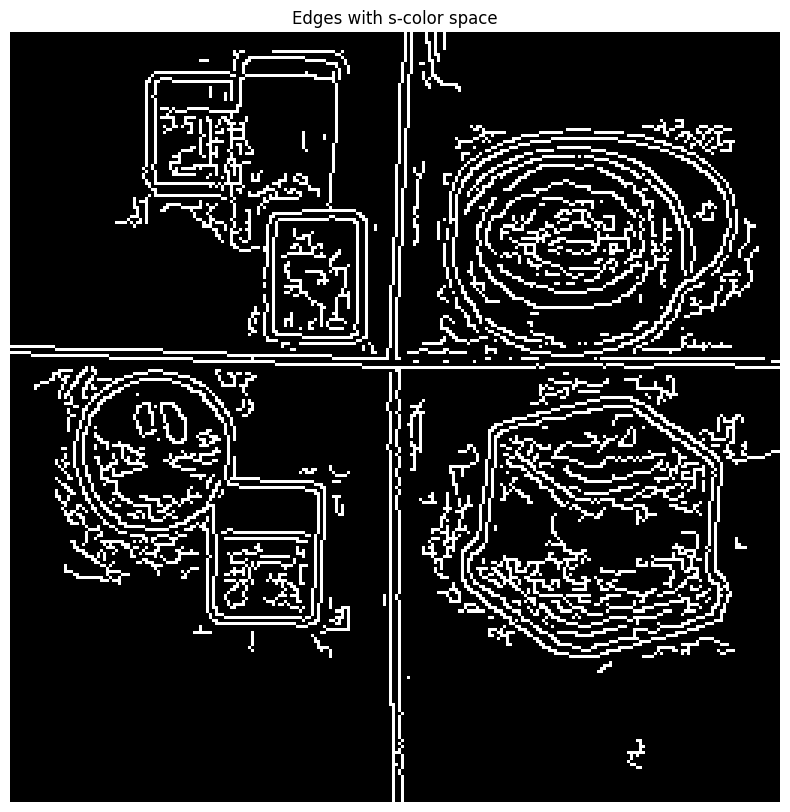

In [58]:
#CODE EXAMPLE. Exercise play with the parameters of v
s_edges = cv2.Canny(hsv[:,:,1], 20, 50) #change parameters 'lower' and 'upper' bounds to get optimal result

plt.figure(figsize=(10,10))
plt.imshow(s_edges, cmap='gray')
plt.title('Edges with s-color space')
plt.axis('off');

## 2. Detecteer gezichten met Haar Cascade

In het college hebben we gesproken over een (verouderde) technologie die jarenlang gebruikt is voor het herkennen objecten in gezichten: Haar Cascade. We gaan deze toch gebruiken, zodat jullie volgende week ook het verschil met moderne technieken als CNN gaan zien.


### OEFENING 4:  Zoek een plaatje en toon het
TO DO:
- Zoek een kleuren foto met 7 gezichten of meer.
- Laad de afbeelding in met de eerder gebruikte matplotlib code
- Laat de foto op het scherm zien. Zet axis op off en geef het plaatje een titel.
 

Text(0.5, 1.0, 'smib')

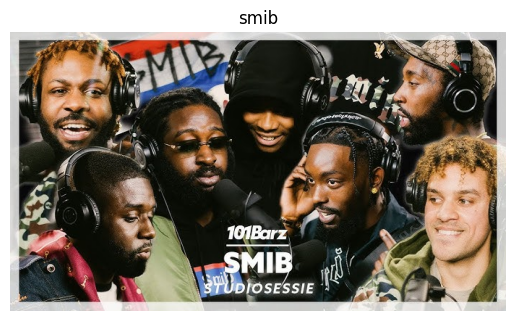

In [71]:
from matplotlib.pyplot import title

# YOUR CODE HERE
img = plt.imread('smib.jpg')
plt.imshow(img)
plt.axis('off')
plt.title("smib")


Welk datatype heeft de ingeladen afbeelding?

Hoe groot is de afbeelding in pixels?
Gebruik de code hieronder.

In [65]:
#print type and shape of image
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(386, 686, 3)


### OEFENING 5: Zet een kleurenplaatje om in een grijswaarden plaatje.

(Als je foto al zwart-wit is dan kun je deze stap overslaan.)

Gebruik de code van oefening 1


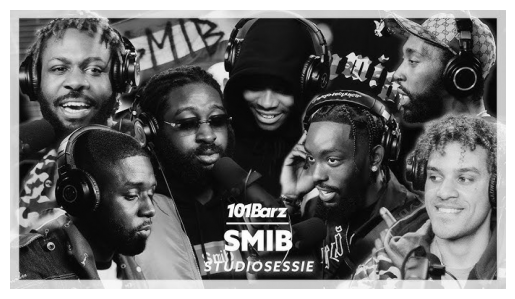

In [89]:
#YOUR CODE HERE
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off');

### Haar Cascade detector


Bekijk de eerste minuut van de volgende video waarin een Haar Cascade wordt gevisualiseerd:
https://vimeo.com/12774628

Haar Cascades gebruiken voorgetrainde modellen. Deze zijn in OpenCV te vinden via ```cv2.data.haarcascades``` method. Je kan/mag ook het haarcascade xml bestand downloaden. 

Een toelichting op Haar Cascade met code voorbeelden kun je hier vinden:
https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/


### OEFENING 6: Initieer de Haar Cascade detector

To do:
- initialiseer de Haar Cascade


In [92]:
# YOUR CODE HERE
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')




### OEFENING 7: Detecteer gezichten

Bepaal met de classifier ``face_cascade.detectMultiScale()`` de gezichten in het plaatje.

Link: https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/

Hoeveel heb je er gevonden?

Answer: 3

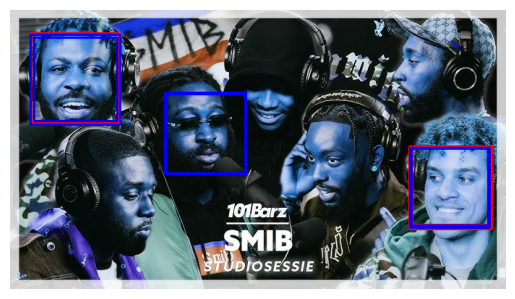

In [111]:
import cv2
import matplotlib.pyplot as plt

# Initialize the Haar Cascade face detector
face_cascade_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade_classifier.detectMultiScale(gray, 1.3, 5)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert the image back to RGB for displaying with Matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with detected faces
plt.imshow(img)
plt.axis('off')
plt.show()

In [106]:
#print shape[0] van de variable faces.
print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 3


In [114]:
# Inspecteer 'faces'. Wat geeft deze array weer denk je?
faces

array([[ 28,  35, 124, 124],
       [216, 117, 109, 109],
       [555, 192, 106, 106]], dtype=int32)

### Toon rechthoeken om de gevonden gezichten

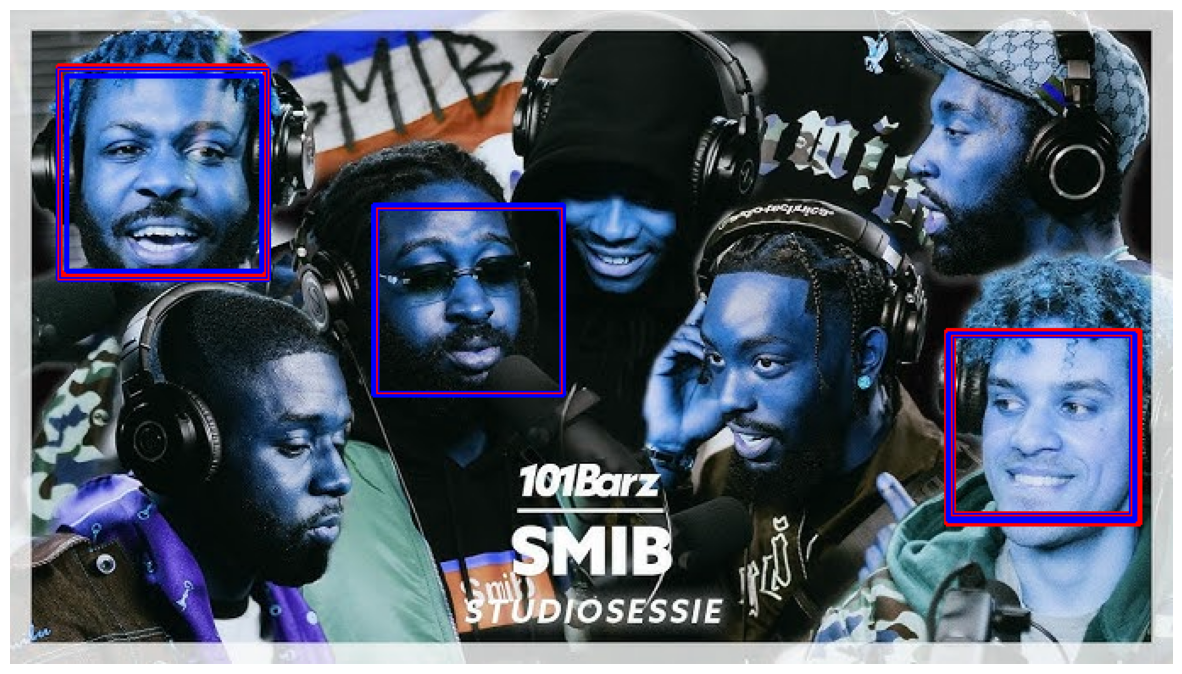

In [115]:
# CODE EXAMPLE to show faces

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1) #maakt een rechthoek met de waarden 
    
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off');

### Evalueer de resultaten

Vragen:
1. Hoe goed is jouw detector in vergelijking met wat je zelf ziet?

Answer 1: It only detected 3 faces, there are 7 in the image.

2. Kun je de parameters van `face_cascade.detectMultiScale` varieren zodat de detectie beter wordt?



To do: Maak hierover een aantekening in je logboek. 

### Detecteer ook de ogen en de mond

Hint: er zijn nog meer .xml files met detectoren

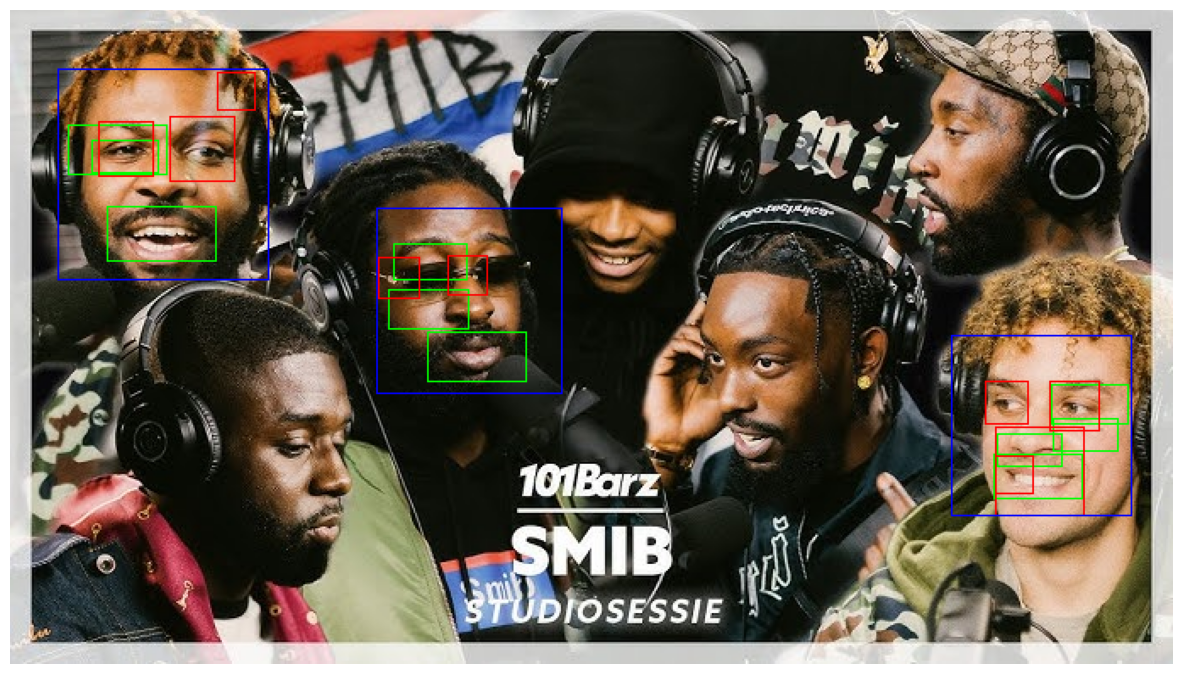

In [119]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img2 = plt.imread('smib.jpg') # change to name/path of your image

# Convert the image to a writable format
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR).copy()

# Initialize the Haar Cascade classifiers
sc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
ec = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Detect smiles and eyes within the faces
for (x, y, w, h) in faces:
    face = img2[y:y + h, x:x + w]
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    smiles = sc.detectMultiScale(face_gray, 1.1, 1, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
    eyes = ec.detectMultiScale(face_gray, 1.001, 1, minSize=(1, 1), flags=cv2.CASCADE_SCALE_IMAGE)
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(face, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 1)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 1)

# Convert the image back to RGB for displaying with Matplotlib
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the image with detected faces, smiles, and eyes
plt.figure(figsize=(15, 10))
plt.imshow(img2)
plt.axis('off')
plt.show()

### Bonus: Blur het gezicht
Zoek in de Geeks for Geeks tutorial onder 'projects' hoe je het gezicht kunt blurren.

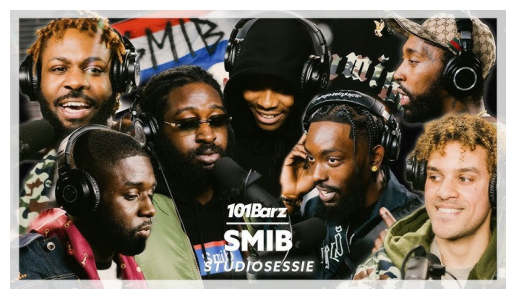

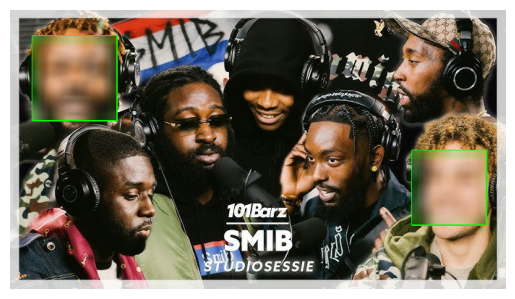

In [124]:
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('_classic_test_patch')  # Use a valid style name
    plt.show()

# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('smib.jpg')

# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(image, 1.3, 5)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = image[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

# Display the output
plotImages(image)

## 3. Gebruik de webcam

De opencv library wordt (nog steeds) veel gebruikt voor het maken van opnames met een webcam. 

Zoek in de documentatie van de ``OpenCV`` library naar ``VideoCapture()``. 

Hint: gebruik de Geeks for Geeks tutorial: https://www.geeksforgeeks.org/opencv-python-tutorial/?ref=lbp  

### OEFENING 8: Maak een script waarbij je de camera aanroept

In [125]:
# YOUR CODE HERE
import cv2

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    # Write the frame to the output file
    out.write(frame)

    # Display the captured frame
    cv2.imshow('Camera', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()


# Afronding

1. Sla het ingevulde notebook op in je portfolio op GitLab - Minor Logboek AAI.
2. Maak een aantekening in je logboek
